In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime as dt 



In [4]:
df_flight = pd.read_csv(r"A:\Data Analytics\Flight Data\airlines.csv")
df_weather = pd.read_csv(r"A:\Data Analytics\Flight Data\nyc_weather.csv")
df_planes = pd.read_csv(r"A:\Data Analytics\Flight Data\nyc_planes.csv")
df_airport = pd.read_csv(r"A:\Data Analytics\Flight Data\nyc_airports.csv")
df_airlines = pd.read_csv(r"A:\Data Analytics\Flight Data\nyc_airlines.csv")
            
                         
    

In [5]:
df_flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [6]:
df_weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


In [7]:
df_planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [8]:
df_airlines.head()

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [9]:
df_airport.head()

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


In [10]:
df=pd.merge(df_flight, df_planes, on='tailnum', how='left')

In [11]:
df.head()

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,minute,time_hour,year_y,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,15,1/1/2013 5:00,1999.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,29,1/1/2013 5:00,1998.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,40,1/1/2013 5:00,1990.0,Fixed wing multi engine,BOEING,757-223,2.0,178.0,NaN,Turbo-fan
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,45,1/1/2013 5:00,2012.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,NaN,Turbo-fan
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,0,1/1/2013 6:00,1991.0,Fixed wing multi engine,BOEING,757-232,2.0,178.0,NaN,Turbo-fan


In [12]:
df=pd.merge(df,df_weather,on=['time_hour','origin'],how='left')

In [13]:
pd.set_option('display.max_columns', 50)
df.head()

,year_x,month_x,day_x,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour_x,minute,time_hour,year_y,type,manufacturer,model,engines,seats,speed,engine,year,month_y,day_y,hour_y,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00,1999.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00,1998.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00,1990.0,Fixed wing multi engine,BOEING,757-223,2.0,178.0,NaN,Turbo-fan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00,2012.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,NaN,Turbo-fan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00,1991.0,Fixed wing multi engine,BOEING,757-232,2.0,178.0,NaN,Turbo-fan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df=df.drop(['month_y','day_y','hour_y','year'], axis=1)

In [15]:
df=df.rename(columns={'year_x': 'year', 'month_x': 'month','hour_x':'hour','day_x':'day','year_y':'year_plane'})

In [16]:
df.isnull().sum()

year                   0
month                  0
day                    0
dep_time            8255
sched_dep_time         0
dep_delay           8255
arr_time            8713
sched_arr_time         0
arr_delay           9430
carrier                0
flight                 0
tailnum             2512
origin                 0
dest                   0
air_time            9430
distance               0
hour                   0
minute                 0
time_hour              0
year_plane         57912
type               52606
manufacturer       52606
model              52606
engines            52606
seats              52606
speed             335813
engine             52606
temp              336776
dewp              336776
humid             336776
wind_dir          336776
wind_speed        336776
wind_gust         336776
precip            336776
pressure          336776
visib             336776
dtype: int64

In [17]:
df.shape

(336776, 36)

In [18]:
df =df.drop(["wind_gust", "precip", "pressure", "visib"], axis=1)


In [19]:
df.isnull().sum()

year                   0
month                  0
day                    0
dep_time            8255
sched_dep_time         0
dep_delay           8255
arr_time            8713
sched_arr_time         0
arr_delay           9430
carrier                0
flight                 0
tailnum             2512
origin                 0
dest                   0
air_time            9430
distance               0
hour                   0
minute                 0
time_hour              0
year_plane         57912
type               52606
manufacturer       52606
model              52606
engines            52606
seats              52606
speed             335813
engine             52606
temp              336776
dewp              336776
humid             336776
wind_dir          336776
wind_speed        336776
dtype: int64

In [20]:
df= df.drop(["wind_dir", "dewp", "humid", "speed", "temp"], axis=1)


In [21]:
df.isnull().sum()

year                   0
month                  0
day                    0
dep_time            8255
sched_dep_time         0
dep_delay           8255
arr_time            8713
sched_arr_time         0
arr_delay           9430
carrier                0
flight                 0
tailnum             2512
origin                 0
dest                   0
air_time            9430
distance               0
hour                   0
minute                 0
time_hour              0
year_plane         57912
type               52606
manufacturer       52606
model              52606
engines            52606
seats              52606
engine             52606
wind_speed        336776
dtype: int64

In [22]:
df.isnull().sum()

year                   0
month                  0
day                    0
dep_time            8255
sched_dep_time         0
dep_delay           8255
arr_time            8713
sched_arr_time         0
arr_delay           9430
carrier                0
flight                 0
tailnum             2512
origin                 0
dest                   0
air_time            9430
distance               0
hour                   0
minute                 0
time_hour              0
year_plane         57912
type               52606
manufacturer       52606
model              52606
engines            52606
seats              52606
engine             52606
wind_speed        336776
dtype: int64

In [23]:
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,year_plane,type,manufacturer,model,engines,seats,engine,wind_speed
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00,1999.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,Turbo-fan,NaN
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00,1998.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,Turbo-fan,NaN
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00,1990.0,Fixed wing multi engine,BOEING,757-223,2.0,178.0,Turbo-fan,NaN
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00,2012.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,Turbo-fan,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00,1991.0,Fixed wing multi engine,BOEING,757-232,2.0,178.0,Turbo-fan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,30-09-2013 14:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,30-09-2013 22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,30-09-2013 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,30-09-2013 11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
d_delay = lambda x: 1 if x > 0 else 0
a_delay = lambda x: 1 if x > 0 else 0
df['d_delay']=df['dep_delay'].apply(d_delay)
df['a_delay']=df['arr_delay'].apply(a_delay)
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,year_plane,type,manufacturer,model,engines,seats,engine,wind_speed,d_delay,a_delay
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00,1999.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,Turbo-fan,NaN,1,1
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00,1998.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,Turbo-fan,NaN,1,1
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00,1990.0,Fixed wing multi engine,BOEING,757-223,2.0,178.0,Turbo-fan,NaN,1,1
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00,2012.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,Turbo-fan,NaN,0,0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00,1991.0,Fixed wing multi engine,BOEING,757-232,2.0,178.0,Turbo-fan,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,30-09-2013 14:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,30-09-2013 22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,30-09-2013 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,30-09-2013 11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [25]:
df.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
year_plane        float64
type               object
manufacturer       object
model              object
engines           float64
seats             float64
engine             object
wind_speed        float64
d_delay             int64
a_delay             int64
dtype: object

In [26]:
df.isnull().sum()

year                   0
month                  0
day                    0
dep_time            8255
sched_dep_time         0
dep_delay           8255
arr_time            8713
sched_arr_time         0
arr_delay           9430
carrier                0
flight                 0
tailnum             2512
origin                 0
dest                   0
air_time            9430
distance               0
hour                   0
minute                 0
time_hour              0
year_plane         57912
type               52606
manufacturer       52606
model              52606
engines            52606
seats              52606
engine             52606
wind_speed        336776
d_delay                0
a_delay                0
dtype: int64

In [27]:
empty_rows = df[df.isna().all(axis=1)]

In [28]:
df=df.dropna(how='any')

In [29]:
df.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,year_plane,type,manufacturer,model,engines,seats,engine,wind_speed,d_delay,a_delay


In [30]:
df['origin'] = df['origin'].astype(str)
df['dest'] = df['dest'].astype(str)

df['route'] = df['origin'].fillna('') + '-' + df['dest'].fillna('')

In [31]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,year_plane,type,manufacturer,model,engines,seats,engine,wind_speed,d_delay,a_delay,route


In [32]:
df['year']=df['year'].astype(str)
df['month']=df['month'].astype(str)
df['day']=df['day'].astype(str)

df['date']=df['year']+'-'+df['month']+'-'+df['day']

In [33]:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')
df['date']=df['date'].dt.tz_localize(None)

In [34]:
df_delay=df[df['d_delay']==1]

In [40]:
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,year_plane,type,manufacturer,model,engines,seats,engine,wind_speed,d_delay,a_delay,route,date


## Time Series of 'Delay Rate' and 'Average Wind Speed'

In [36]:
df_flightNO=pd.DataFrame(df.groupby('date')['flight'].count())
df_flightDL=pd.DataFrame(df_delay.groupby('date')['flight'].count())

In [37]:
y1=df_flightNO['flight']
y2=df_flightDL['flight']
y3=y2/y1*100
y4=df_delay.groupby('date')['wind_speed'].mean()

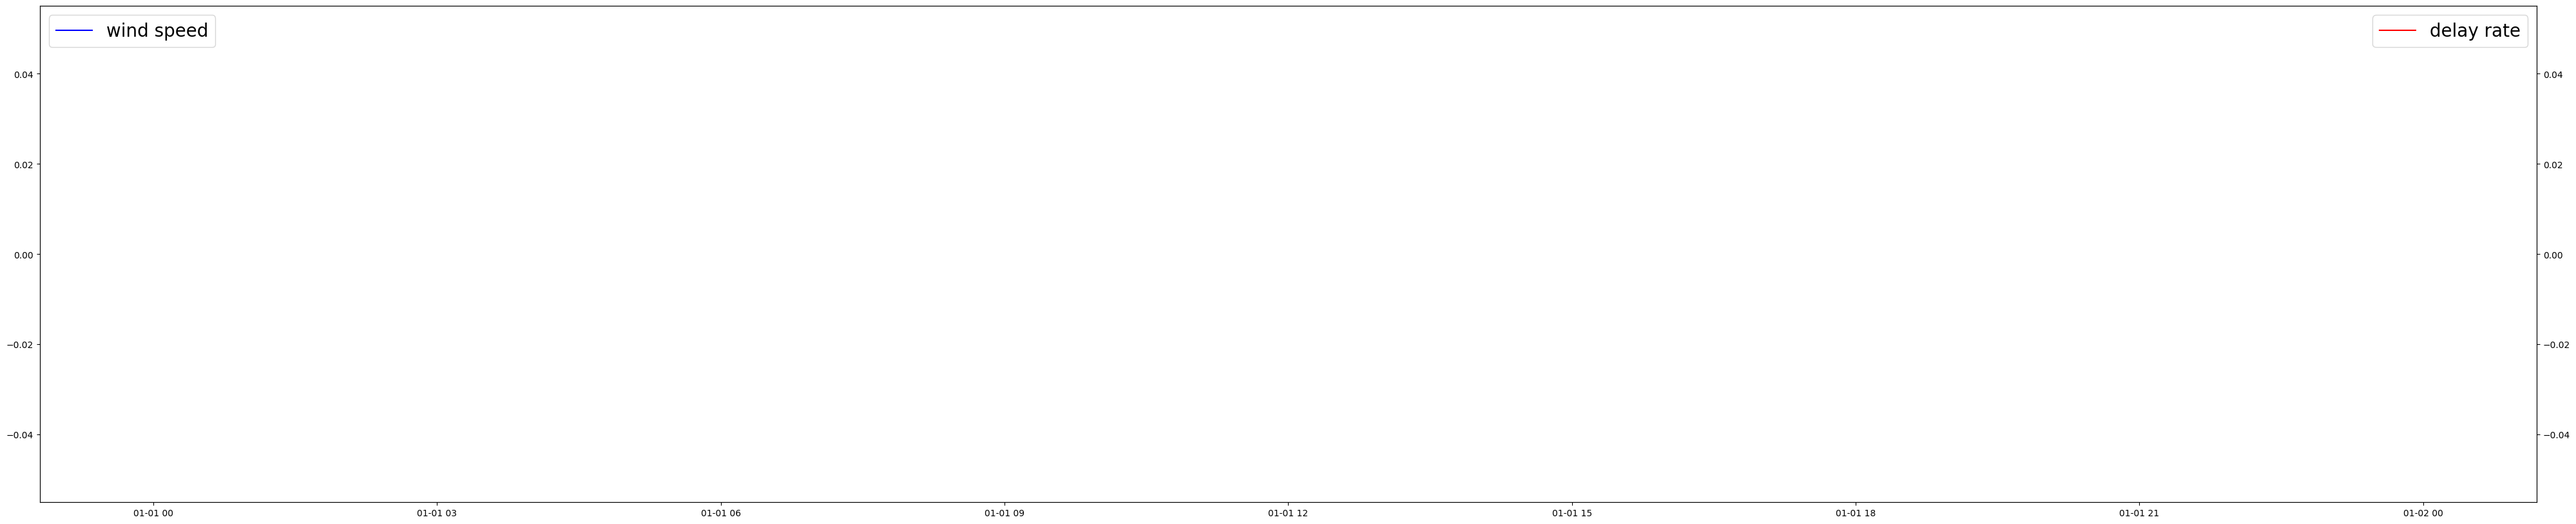

In [38]:

fig, ax1 = plt.subplots(figsize=(50,10))
ax2 = ax1.twinx()
ax1.plot(y3,label="delay rate",color='red')
ax2.plot(y4,label="wind speed",color='blue')
ax1.legend(loc=1,fontsize=20)
ax2.legend(loc=2,fontsize=20)

plt.show()

##  Route analysis

In [41]:
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,year_plane,type,manufacturer,model,engines,seats,engine,wind_speed,d_delay,a_delay,route,date
